In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#                                          BUSINESS PROBLEM-1

In [2]:
loan_data= pd.read_csv('LoansData.csv')

In [3]:
loan_data

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [5]:
loan_data.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

## a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)



### Ho : Intrest rate does not varies for differnt loan amount.
### Ha : Intrest rate does varies for differnt loan amount.

### CI =95%
### p-Value = 0.05

In [6]:
loan_data["Amount.Requested"]

0       20000.0
1       19200.0
2       35000.0
3       10000.0
4       12000.0
         ...   
2495    30000.0
2496    16000.0
2497    10000.0
2498     6000.0
2499     9000.0
Name: Amount.Requested, Length: 2500, dtype: float64

In [7]:
loan_data['Interest.Rate']

0        8.90%
1       12.12%
2       21.98%
3        9.99%
4       11.71%
         ...  
2495    16.77%
2496    14.09%
2497    13.99%
2498    12.42%
2499    13.79%
Name: Interest.Rate, Length: 2500, dtype: object

In [8]:
# transform the Interest.Rate by removing % sign and datetype to float 
loan_data['Interest_Rate']=pd.to_numeric(loan_data['Interest.Rate'].str.replace('%',""))

In [9]:
loan_data['Interest_Rate']

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2495    16.77
2496    14.09
2497    13.99
2498    12.42
2499    13.79
Name: Interest_Rate, Length: 2500, dtype: float64

In [10]:
# null values treatment for Interest_Rate and Amount.Requested
loan_data.fillna({'Interest_Rate':loan_data.Interest_Rate.mode()[0]}, inplace=True)

loan_data.fillna({'Amount.Requested': loan_data["Amount.Requested"].mean()}, inplace=True)

print(loan_data.Interest_Rate.isna().sum())
print(loan_data["Amount.Requested"].isna().sum())


0
0


In [11]:
# Perform the Test statitics. we will perform the correlation test as both the variables are numarical continous variable.
stats.pearsonr(loan_data["Amount.Requested"],loan_data.Interest_Rate)

(0.33240946119905634, 1.4646809963138709e-65)

### There is Positive releationship with Loan amount requested and interest rate offer by bank.
### Thus, Intrest rate does varies for differnt loan amount.
### P-Value is very less. thus, we reject the Null hypothesis.

## Next Question
## b. Loan length is directly effecting intrest rate.

### Ho : Loan Length is not directly effecting intrest rate
### Ha : Loan Length is directly effecting intrest rate.


### CI=95%
### P-Value =0.05

In [12]:
loan_data["Loan.Length"].unique()

array(['36 months', '60 months'], dtype=object)

In [13]:
loan_data.Interest_Rate

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2495    16.77
2496    14.09
2497    13.99
2498    12.42
2499    13.79
Name: Interest_Rate, Length: 2500, dtype: float64

In [14]:
a1=loan_data.loc[loan_data["Loan.Length"]=='36 months','Interest_Rate' ]
a2=loan_data.loc[loan_data["Loan.Length"]=='60 months','Interest_Rate' ]

In [15]:
print ("Mean of Interest_Rate for 36 months ", a1.mean(), " \nMean of Interest_Rate for 60 months ",a2.mean())

Mean of Interest_Rate for 36 months  12.126173155737813  
Mean of Interest_Rate for 60 months  16.40746350364961


In [16]:
# we will perform the T-Test for independed two variable. as these are two different variable.
stats.ttest_ind (a1,a2)

Ttest_indResult(statistic=-23.41636550810549, pvalue=8.529143234121489e-110)

### P-Value is very less. thus, we reject the Null hypothesis.

### Thus, Loan lenght directly effecting the intrest rate.

## Next Question
## c. Interest rate varies for different purpose of loans


### Ho : Interest rate doest not varies for different purpose of loans.
### Ha : Interest rate does varies for differnt purpose of loans.

### CI=95%
### P-Value = 0.05


In [17]:
loan_data["Loan.Purpose"].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [18]:
loan_data.Interest_Rate

0        8.90
1       12.12
2       21.98
3        9.99
4       11.71
        ...  
2495    16.77
2496    14.09
2497    13.99
2498    12.42
2499    13.79
Name: Interest_Rate, Length: 2500, dtype: float64

In [19]:
l1=loan_data.loc[loan_data["Loan.Purpose"]== 'debt_consolidation' ,'Interest_Rate' ]
l2=loan_data.loc[loan_data["Loan.Purpose"]== 'credit_card' ,'Interest_Rate' ]
l3=loan_data.loc[loan_data["Loan.Purpose"]== 'moving' ,'Interest_Rate' ]
l4=loan_data.loc[loan_data["Loan.Purpose"]== 'car' ,'Interest_Rate' ]
l5=loan_data.loc[loan_data["Loan.Purpose"]== 'vacation' ,'Interest_Rate' ]
l6=loan_data.loc[loan_data["Loan.Purpose"]== 'home_improvement' ,'Interest_Rate' ]
l7=loan_data.loc[loan_data["Loan.Purpose"]== 'house' ,'Interest_Rate' ]
l8=loan_data.loc[loan_data["Loan.Purpose"]== 'major_purchase' ,'Interest_Rate' ]
l9=loan_data.loc[loan_data["Loan.Purpose"]== 'educational' ,'Interest_Rate' ]
l10=loan_data.loc[loan_data["Loan.Purpose"]=='medical' ,'Interest_Rate' ]
l11=loan_data.loc[loan_data["Loan.Purpose"]=='wedding' ,'Interest_Rate' ]
l12=loan_data.loc[loan_data["Loan.Purpose"]=='small_business' ,'Interest_Rate' ]
l13=loan_data.loc[loan_data["Loan.Purpose"]=='renewable_energy' ,'Interest_Rate' ]
l15=loan_data.loc[loan_data["Loan.Purpose"]=='other' ,'Interest_Rate' ]

In [20]:
# Perform the test statitics. we will perform the ANOVA as there are more the two categories for loan purpose.
print (
'\n mean of debt_consolidation',l1.mean(),
'\n mean of credit_card',l2.mean(),
'\n mean of moving',l3.mean(),
'\n mean of car',l4.mean(),
'\n mean of vacation',l5.mean(),
'\n mean of home_improvement',l6.mean(),
'\n mean of house', l7.mean(),
'\n mean of major_purchase',l8.mean(),
'\n mean of educational', l9.mean(),
'\n mean of medical',l10.mean(),
'\n mean of wedding',l11.mean(),
'\n mean of small_business',l12.mean(),
'\n mean of renewable_energy', l13.mean(),
'\n mean of Others' ,l15.mean() )


 mean of debt_consolidation 13.586916602907444 
 mean of credit_card 13.048558558558533 
 mean of moving 13.621034482758622 
 mean of car 11.113000000000001 
 mean of vacation 11.966190476190476 
 mean of home_improvement 11.594276315789479 
 mean of house 13.448000000000002 
 mean of major_purchase 10.797821782178215 
 mean of educational 11.007333333333332 
 mean of medical 11.649666666666668 
 mean of wedding 12.04897435897436 
 mean of small_business 12.839195402298845 
 mean of renewable_energy 9.8775 
 mean of Others 13.159552238805967


In [21]:
#  there are more the one variable. thus, we will perform the ANOVA/F-oneway Test
stats.f_oneway(l1,
l2,
l3,
l4,
l5,
l6,
l7,
l8,
l9,
l10,
l11,
l12,
l13,
l15)

F_onewayResult(statistic=7.491453851847694, pvalue=1.1044428447897775e-14)

### P-Value is low. Thus, we reject the null hypothesis.
### Interest rate doest varies for diffrent purpose of loans.

## Next Questions
## There is relationship between FICO scores and Home Ownership. It means that, People
## with owning home will have high FICO scores.

#### Ho : there is NO releationship between FICO Score and Home Ownership.
#### Ha : There is releationship between FICO Score and Home Ownership.

#### CI=95%
#### P- Value =0.05

In [54]:
# Transform the FICO column to get the FICO values

loan_data['FICO_min']=loan_data["FICO.Range"].str.split("-").str[0].dropna().astype('int64')
loan_data['FICO_max']=loan_data["FICO.Range"].str.split("-").str[1].dropna().astype('int64')


In [72]:
# calculate the FICO mean 
loan_data['FICO_Mean']=round(loan_data['FICO_min']+loan_data['FICO_max']/loan_data['FICO_min'].count(),2)

In [99]:
# fill the missing values we mean.
loan_data.FICO_Mean.fillna(loan_data.FICO_Mean.mean(),inplace=True)

In [105]:
loan_data['Home.Ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', nan], dtype=object)

In [119]:

MORTGAGE=loan_data.loc[loan_data["Home.Ownership"]=='MORTGAGE','FICO_Mean']
RENT=loan_data.loc[loan_data["Home.Ownership"]=='RENT','FICO_Mean']
OWN=loan_data.loc[loan_data["Home.Ownership"]=='OWN','FICO_Mean']
OTHER=loan_data.loc[loan_data["Home.Ownership"]=='OTHER','FICO_Mean']

In [120]:
print ("mean of MORTGAGE - "+str(MORTGAGE.mean()),
      "\nmean of RENT - "+str(RENT.mean()),
      "\nmean of OWN - "+str(OWN.mean()),
      "\nmean of OTHER - "+str(OTHER.mean()))

mean of MORTGAGE - 711.9788309950601 
mean of RENT - 700.3440132210595 
mean of OWN - 706.8348499999996 
mean of OTHER - 672.2679999999999


In [123]:
# there are more the one variable. Thus, we will perform the ANOVA/F_oneway test
f_stats_home_owner=stats.f_oneway(MORTGAGE,RENT,OWN,OTHER)
f_stats_home_owner

F_onewayResult(statistic=23.30477025085848, pvalue=7.106057474289446e-15)

In [124]:

p_value=f_stats_home_owner.pvalue
if(p_value <0.05):
    print("we reject the Null Hypothesis")
else:
        print("We fail to reject null hypothesis")


we reject the Null Hypothesis



### In output, the p-value is low. So we will reject null Hypothesis and conclude that FICO scores are not impacted by home ownership. there are others factors as well which contribute to FICO score.

# BUSINESS PROBLEM - 2    

## Question - We would like to assess if there is any difference in the average
## price quotes provided by Mary and Barry.

### Ho : there is NO difference in the average price quotes provided by Mary and Barry.
### Ha : there is difference in the average price quotes provided by Mary and Barry.

### CI=95%
### P-Value = 0.05

In [100]:
price_quote=pd.read_csv("Price_Quotes.csv")

In [101]:
price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [102]:
price_quote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [104]:
price_quote["Barry_Price"].describe()

count     12.000000
mean     124.333333
std       20.698412
min       94.000000
25%      106.750000
50%      131.000000
75%      140.500000
max      152.000000
Name: Barry_Price, dtype: float64

In [106]:
price_quote["Mary_Price"].describe()

count     12.000000
mean     114.750000
std       11.054616
min       97.000000
25%      107.000000
50%      114.000000
75%      121.000000
max      133.000000
Name: Mary_Price, dtype: float64

In [ ]:
# we will perform the paired T- Test.

In [114]:
pval=stats.ttest_rel(price_quote.Barry_Price,price_quote.Mary_Price)
pval

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

In [113]:
p=pval.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


### P-Value is less than the 0.05. Thus, we reject the null hypothesis and Accept the Ha.
## There is difference in the average price quotes provided by Mary and Barry.


# BUSINESS PROBLEM-3: 
### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

### Ho : There is No Effect of  reengineering effort on the incidence behavioral problems and staff turnover.
### Ha : There is Effect of  reengineering effort on the incidence behavioral problems and staff turnover.

### CI =95%
### P-Value : 0.05

In [116]:
TF=pd.read_csv('Treatment_Facility.csv')

In [117]:
TF

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [123]:
TF.rename(columns ={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [124]:
TF

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [ ]:
# we need CI% before and after the reengineering effort 

In [141]:
pre=TF[TF.Reengineer=='Prior']['CI']
pre

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CI, dtype: float64

In [143]:
post=TF[TF.Reengineer=='Post']['CI']
post

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CI, dtype: float64

In [152]:
print ('mean before the reengineering =',pre.mean(), '\nmean before the reengineering =' ,post.mean())

mean before the reengineering = 53.887906321846145 
mean before the reengineering = 23.34971927988571


In [ ]:
# we will performe the t-test

In [156]:
per_post_stats=stats.ttest_ind(pre,post)
per_post_stats

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

In [157]:
p=per_post_stats.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### There is Effect of reengineering effort on the incidence behavioral problems and staff turnover.

## BUSINESS PROBLEM-4

### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

## Ho : prioritization system has NO effect on jobs.
## Ha : prioritization system has effect on jobs.

### CI=95%
### P-Value = 95%

In [160]:
PA=pd.read_csv('Priority_Assessment.csv')
PA

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [163]:
PA.Priority.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [170]:
high=PA[PA.Priority=='High']['Days']
medium=PA[PA.Priority=='Medium']['Days']
low=PA[PA.Priority=='Low']['Days']

In [171]:
print('mean of high', high.mean(),'\nmean of medium',medium.mean(),'\nmean of low',low.mean())

mean of high 3.023619631901845 
mean of medium 2.5000000000000004 
mean of low 4.228358208955225


In [ ]:
# there are more than on sample. thus, we will perform the ANOVA/F_oneway Test.

In [173]:
f_stats=stats.f_oneway(high,medium,low)
f_stats

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [179]:
p_value=f_stats.pvalue
if(p_value <0.05):
    print("we reject the Null Hypothesis")
else:
        print("We fail to reject null hypothesis")

We fail to reject null hypothesis


### Thus , prioritization system has NO effect on jobs.

# BUSINESS PROBLEM-5



In [250]:
survey_data=pd.read_csv('Films.csv')
survey_data

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [251]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [ ]:
# EDA and Missing value treatment

In [252]:
survey_data.Gender.unique()

array(['Female', 'Male', '2', '1'], dtype=object)

In [253]:
survey_data.loc[survey_data['Gender'] =='Male','Gender']='1'

In [254]:
survey_data.Gender.unique()

array(['Female', '1', '2'], dtype=object)

In [255]:
survey_data.loc[survey_data['Gender'] =='Female','Gender']='2'

In [256]:
survey_data.Gender.unique()

array(['2', '1'], dtype=object)

In [257]:
survey_data.Marital_Status.unique()

array(['Married', 'Single', 'Slngle', '1', '2', nan], dtype=object)

In [258]:
survey_data.loc[survey_data['Marital_Status']=='Married','Marital_Status']='1'

In [259]:
survey_data.Marital_Status.unique()

array(['1', 'Single', 'Slngle', '2', nan], dtype=object)

In [261]:
survey_data.loc[(survey_data.Marital_Status=='Single')| (survey_data.Marital_Status=='Slngle'),'Marital_Status']='2'

In [262]:
survey_data.Marital_Status.unique()

array(['1', '2', nan], dtype=object)

In [266]:
survey_data.Marital_Status.isna().sum()

2

In [283]:
survey_data.Marital_Status.fillna(survey_data.Marital_Status.mode().iloc[0],inplace=True)


In [284]:
survey_data.Marital_Status.unique()

array(['1', '2'], dtype=object)

In [286]:
survey_data[survey_data['Marital_Status'].isna()]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About


In [287]:
survey_data.loc[[139,323]]

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
139,0,Willy Wonka,1,2,2.0,2.0,2.0,1.0,2.0,1.0,5
323,0,Old School,1,2,2.0,2.0,2.0,2.0,2.0,3.0,5


In [289]:
survey_data.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     0
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [292]:
survey_data.Age.unique()

array([ 3.,  2.,  4.,  1., nan])

## What is the overall level of customer satisfaction?

<AxesSubplot:ylabel='Frequency'>

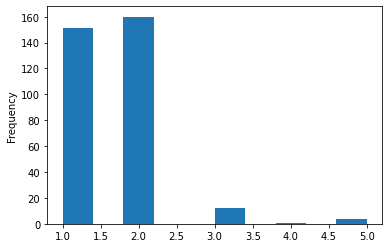

In [380]:
# What is the overall level of customer satisfaction?
survey_data.Overall.plot(kind="hist")


                        




### Overall customer satisfaction is excellent and Good

## What factors are linked to satisfaction?

In [397]:
observed =pd.crosstab(index=survey_data.Overall,columns=(survey_data.Parking))
observed
stats.chi2_contingency(observed)

(229.47943657632044,
 8.162450437897989e-40,
 16,
 array([[6.18776758e+01, 7.06513761e+01, 1.33914373e+01, 3.23241590e+00,
         1.84709480e+00],
        [6.51559633e+01, 7.43944954e+01, 1.41009174e+01, 3.40366972e+00,
         1.94495413e+00],
        [4.91743119e+00, 5.61467890e+00, 1.06422018e+00, 2.56880734e-01,
         1.46788991e-01],
        [4.09785933e-01, 4.67889908e-01, 8.86850153e-02, 2.14067278e-02,
         1.22324159e-02],
        [1.63914373e+00, 1.87155963e+00, 3.54740061e-01, 8.56269113e-02,
         4.89296636e-02]]))

In [398]:
observed1 =pd.crosstab(index=survey_data.Overall,columns=(survey_data.Sinage))
observed1
stats.chi2_contingency(observed1)

(124.81695331531306,
 6.47639805161236e-19,
 16,
 array([[5.18348624e+01, 7.11009174e+01, 2.20183486e+01, 2.75229358e+00,
         2.29357798e+00],
        [5.52905199e+01, 7.58409786e+01, 2.34862385e+01, 2.93577982e+00,
         2.44648318e+00],
        [4.14678899e+00, 5.68807339e+00, 1.76146789e+00, 2.20183486e-01,
         1.83486239e-01],
        [3.45565749e-01, 4.74006116e-01, 1.46788991e-01, 1.83486239e-02,
         1.52905199e-02],
        [1.38226300e+00, 1.89602446e+00, 5.87155963e-01, 7.33944954e-02,
         6.11620795e-02]]))

In [399]:
observed2 =pd.crosstab(index=survey_data.Overall,columns=(survey_data.Clean))
observed2
stats.chi2_contingency(observed2)

(125.17708834561675,
 5.517448379868074e-19,
 16,
 array([[6.64954128e+01, 7.01896024e+01, 1.10825688e+01, 2.30886850e+00,
         9.23547401e-01],
        [7.00183486e+01, 7.39082569e+01, 1.16697248e+01, 2.43119266e+00,
         9.72477064e-01],
        [5.28440367e+00, 5.57798165e+00, 8.80733945e-01, 1.83486239e-01,
         7.33944954e-02],
        [4.40366972e-01, 4.64831804e-01, 7.33944954e-02, 1.52905199e-02,
         6.11620795e-03],
        [1.76146789e+00, 1.85932722e+00, 2.93577982e-01, 6.11620795e-02,
         2.44648318e-02]]))

In [407]:
survey_data.Overall.dropna()

0      2.0
1      1.0
2      2.0
3      2.0
4      1.0
      ... 
325    1.0
326    2.0
327    2.0
328    1.0
329    1.0
Name: Overall, Length: 328, dtype: float64

In [411]:

stats.pearsonr(survey_data.Overall.dropna(),survey_data.Parking.dropna())

(0.5084697465891809, 5.74344973830048e-23)

In [412]:
stats.pearsonr(survey_data.Overall.dropna(),survey_data.Sinage.dropna())

(0.38735292893717305, 3.478970759719073e-13)

In [410]:
survey_data.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     0
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64


## Chi_square and pearson corelation shows that there is strong releanship between overall and parking, which affecting the overall satisfaction level.

## What is the demographic profile of Film on the Rocks patrons?


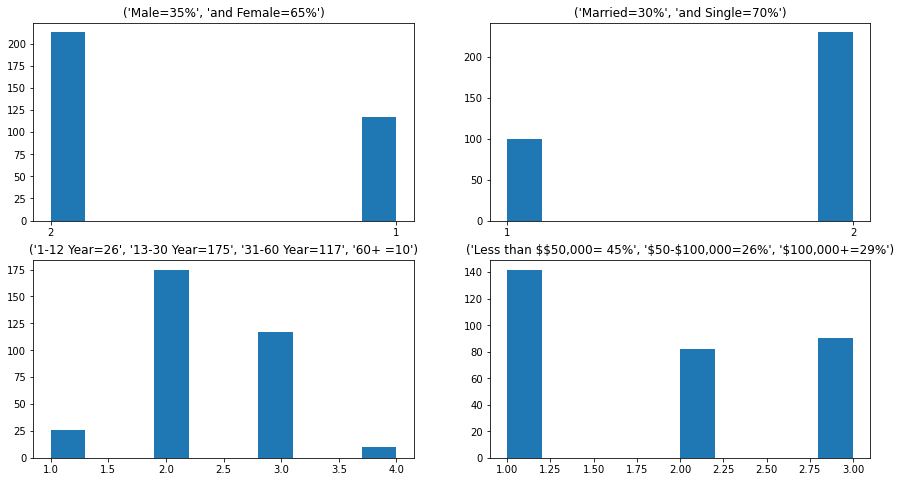

In [685]:
Gender_title=('Male=' +str(round(((survey_data.Gender=='1').sum()/survey_data.Gender.count())*100))+str('%'),
            'and Female='+str(round(((survey_data.Gender=='2').sum()/survey_data.Gender.count())*100))+str('%'))

status_title=('Married='+str(round(((survey_data.Marital_Status=='1').sum()/survey_data.Marital_Status.count())*100))+str('%'),
            'and Single=' +str(round(((survey_data.Marital_Status=='2').sum()/survey_data.Marital_Status.count())*100))+str('%'))

age_title=('1-12 Year='+str(survey_data.loc[survey_data.Age==1.0,'Age'].count()),'13-30 Year=' 
             +str(survey_data.loc[survey_data.Age==2.0,'Age'].count()),
            '31-60 Year='+str(survey_data.loc[survey_data.Age==3.0,'Age'].count()),
            '60+ ='+str(survey_data.loc[survey_data.Age==4.0,'Age'].count()))

Income_title=('Less than $$50,000= ' +str(round(((survey_data.Income.dropna()==1.0).sum()/(survey_data.Income.dropna()).count())*100)) +str('%'),
              '$50-$100,000='  +str(round(((survey_data.Income.dropna()==2.0).sum()/(survey_data.Income.dropna()).count())*100))+str('%'),
              '$100,000+='+str(round(((survey_data.Income.dropna()==3.0).sum()/(survey_data.Income.dropna()).count())*100))+str('%'))


fig, ax = plt.subplots(2,2, figsize=(15,8))
ax[0,0].hist(survey_data.Gender)
ax[0,0].set_title(Gender_title)
ax[0,1].hist(survey_data.Marital_Status)
ax[0,1].set_title(status_title)
ax[1,0].hist(survey_data.Age)
ax[1,0].set_title(age_title)
ax[1,1].hist(survey_data.Income)
ax[1,1].set_title(Income_title)
plt.show()




## 65% are Females
## 70% are Singles
## Max patrons are for 13-30 years of Age 
## 45% patrons have income less than 50,000

## In what media outlet(s) should the film series be advertised?
## 1 = television; 2 =newspaper; 3 = radio; 4 = website; 5 = word of mouth

<AxesSubplot:>

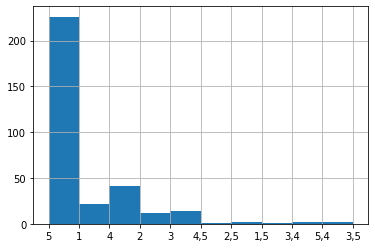

In [694]:
survey_data.Hear_About.hist()


## Most of the customer Hear About from word of mouth